In [1]:
%matplotlib notebook 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    import h5py
try:
    import awkward0 as awkward
except ModuleNotFoundError:
    import awkward

In [3]:
#Simple DD+ Pretrained. Thrown Out
#Everything
# folders = ['07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it0pretrain_250_epochs_1e-05',
#             '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it0pretrain_250_epochs_1e-05',
#             '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it0pretrain_250_epochs_1e-05',
#             #'07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_it0pretrain_nodes_250_epochs_1e-05',
#             '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it0pretrain_250_epochs_1e-05',
#             '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_it0pretrain_250_epochs_1e-05']

#20~50
# folders = ['07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it0pretrain_250_epochs_1e-05',
#            '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it0pretrain_250_epochs_1e-05',
#            '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it0pretrain_250_epochs_1e-05']

#50
# folders = ['07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it0pretrain_250_epochs_1e-05',
#            '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it0pretrain_250_epochs_1e-05']

#100~500
# folders = ['07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_250_epochs_1e-05nopretrain',
#             '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_250_epochs_1e-05nopretrain',
#             '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it0pretrain_250_epochs_1e-05',
#             '07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_it0pretrain_250_epochs_1e-05']

#500
# folders = ['07Feb_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_it0pretrain_250_epochs_1e-05']

#Weight Freezing
#Everything
# folders = ['16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it0pretrain_250_epochs_1e-05',
#            '16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it0pretrain_250_epochs_1e-05',
#            '16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it0pretrain_250_epochs_1e-05',
#            '16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it0pretrain_250_epochs_1e-05',
#            '17July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_it0pretrain_250_epochs_1e-05',
#            '17July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_it0pretrain_250_epochs_1e-05']
#20~5to100
# folders = ['16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it0pretrain_250_epochs_1e-05',
#            '16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it0pretrain_250_epochs_1e-05',
#            '16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it0pretrain_250_epochs_1e-05']
#20/50/5to100
# folders = ['16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it0pretrain_250_epochs_1e-05',
#            '16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it0pretrain_250_epochs_1e-05',
#            '17July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_it0pretrain_250_epochs_1e-05']
#5to50
# folders = ['16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it0pretrain_250_epochs_1e-05']

#100~5to500
# folders = ['16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it0pretrain_250_epochs_1e-05',
#            '17July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_it0pretrain_250_epochs_1e-05']

#Post Weight Freezing
# folders = ['19July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it0pretrain_it29prefreeze_250_epochs_1e-05',
#            '19July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it0pretrain_it29prefreeze_250_epochs_1e-05',
#            '19July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it0pretrain_it29prefreeze_250_epochs_1e-05',
#            '20July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_it0pretrain_it29prefreeze_250_epochs_1e-05',
#            '20July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it0pretrain_it29prefreeze_250_epochs_1e-05',
#            '20July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to500_nodes_it0pretrain_250_epochs_1e-05']

#Kick
folders = ['22July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_unstick_attpt_50_epochs_0.0001',
           '22July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_unstick_attpt_50_epochs_0.0001']

#Normal Training
folders = ['23July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_20_nodes_it29pretrain_250_epochs_1e-05',
                     '23July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to50_nodes_it29pretrain_250_epochs_1e-05',
                     '23July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_50_nodes_it29pretrain_250_epochs_1e-05',
                     '23July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_5to100_nodes_it29pretrain_250_epochs_1e-05',
                     '23July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_100_nodes_it29pretrain_250_epochs_1e-05']

In [4]:
data = {}
for folder in folders:
    fullpath = 'jgo_files/' + folder + '/' + folder + '_stats.hdf5'
    if 'Feb' in folder:
        if 'nopretrain' in folder:
            index = folder[44:folder.index('nodes')+5]
        else:
            index = folder[44:folder.index('pretrain')+len('pretrain')]
    else:
        if 'nopretrain' in folder:
            index = folder[49:folder.index('nodes')+5]
        elif '16July' in folder or '17July' in folder:
            index = folder[49:folder.index('pretrain')+len('pretrain')] + '_11frozen'
        elif 'prefreeze' in folder:
            index = folder[49:folder.index('prefreeze')+len('prefreeze')]
        elif 'unstick_attpt' in folder:
            index = folder[49:folder.index('unstick_attpt')+len('unstick_attpt')]
        else:
            index = folder[49:folder.index('pretrain')+len('pretrain')]
    with h5py.File(fullpath, mode="r") as f:
        columns = []
        for i in np.asarray(f['results']['axis0']):
            columns.append(i.decode('UTF-8'))
        datum = pd.DataFrame(np.asarray(f['results']['block0_values']), columns = columns)
        data[index] = datum
    

<IPython.core.display.Javascript object>


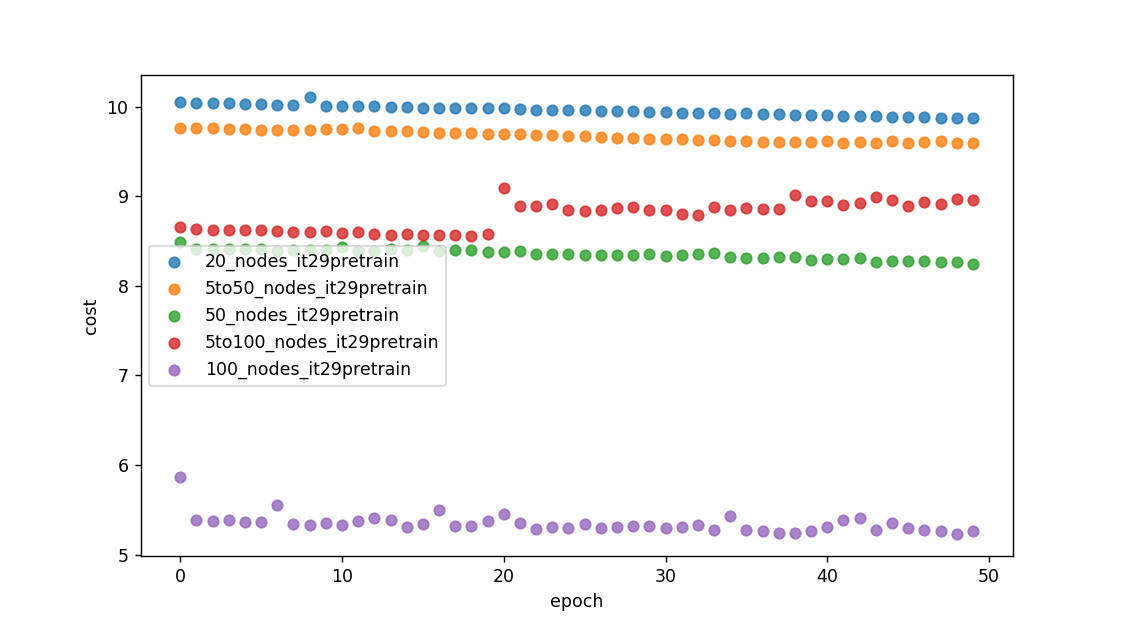

In [5]:
x = 'epoch'
y = 'cost'
transparency = .8
e_range = (0, 50)
fig = plt.figure(figsize = (9, 5))
legender = []
for index in data:
    datum = data[index]
    plt.scatter(datum[x][e_range[0]:e_range[1]], datum[y][e_range[0]:e_range[1]], alpha = transparency)
    legender.append(index)
#plt.yscale("log")
plt.legend(legender)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

<IPython.core.display.Javascript object>


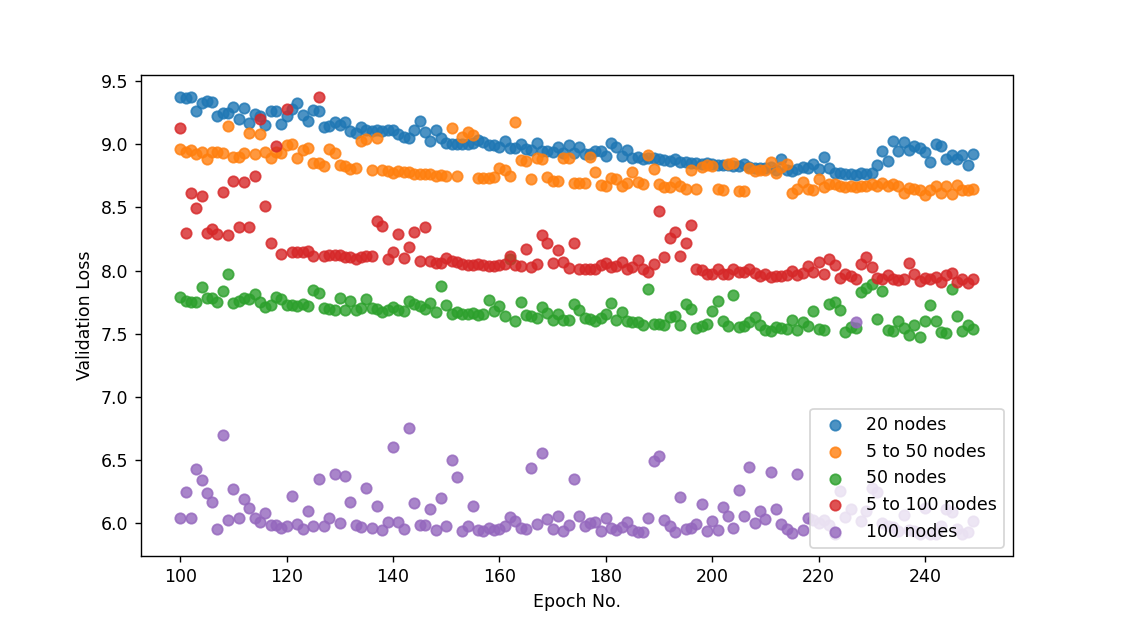

In [6]:
x = 'epoch'
y = 'val'
transparency = .8
e_range = (100, 250)
fig = plt.figure(figsize = (9, 5))
legender = []
for index in data:
    datum = data[index]
    plt.scatter(datum[x][e_range[0]:e_range[1]], datum[y][e_range[0]:e_range[1]], alpha = transparency)
    legender.append(index)
#plt.yscale("log")
plt.legend(['20 nodes', '5 to 50 nodes', '50 nodes', '5 to 100 nodes', '100 nodes', '5 to 500 nodes'])
plt.xlabel('Epoch No.')
plt.ylabel('Validation Loss')
plt.show()

In [7]:
len('16July2021_DDplus_loss_Ba_iter29_floatAll_SetVar_')

49

In [8]:
print('Best Epochs:')
best = {}
for index in legender:
    print(index)
    datum = data[index]
    bestcostind = np.array(datum['epoch'][datum['cost'] == np.min(datum['cost'])])
    bestcost = np.min(datum['cost'])
    print('By Train Cost   Index:', bestcostind, '  Cost:', bestcost)
    bestvalind = np.array(datum['epoch'][datum['val'] == np.min(datum['val'])])
    bestval = np.min(datum['val'])
    print('By Test Cost    Index:', bestvalind, '  Cost:', bestval)
    print()
    best[index] = bestvalind
    

Best Epochs:
20_nodes_it29pretrain
By Train Cost   Index: [249.]   Cost: 9.152987993446885
By Test Cost    Index: [227.]   Cost: 8.757030198528508

5to50_nodes_it29pretrain
By Train Cost   Index: [244.]   Cost: 9.029907436127875
By Test Cost    Index: [240.]   Cost: 8.600549943887504

50_nodes_it29pretrain
By Train Cost   Index: [244.]   Cost: 7.734212395491873
By Test Cost    Index: [239.]   Cost: 7.476395828708721

5to100_nodes_it29pretrain
By Train Cost   Index: [249.]   Cost: 7.899259539926128
By Test Cost    Index: [248.]   Cost: 7.90306671106132

100_nodes_it29pretrain
By Train Cost   Index: [238.]   Cost: 4.78487800944383
By Test Cost    Index: [242.]   Cost: 5.909765240493094



In [9]:
# stuff = []
# for i in best:
#     stuff.append('13July2021_DirtyDozen_SetVar_' + i + '_500_epochs_0.0001_' + str(best[i][1:len(best(i))-2]) + '.pyt')
# print(stuff)

In [10]:
print('End Results:')
best = {}
for index in legender:
    print(index)
    datum = data[index]
    bestcost = datum['cost'].iloc[len(datum['cost']) - 1]
    print('End Train Cost:', bestcost)
    bestcost = datum['val'].iloc[len(datum['val']) - 1]
    print('End Test Cost:', bestcost)
    print()
    best[index] = bestvalind

End Results:
20_nodes_it29pretrain
End Train Cost: 9.152987993446885
End Test Cost: 8.926450820485497

5to50_nodes_it29pretrain
End Train Cost: 9.036505538187209
End Test Cost: 8.64705069049908

50_nodes_it29pretrain
End Train Cost: 7.747243197860231
End Test Cost: 7.534257226688847

5to100_nodes_it29pretrain
End Train Cost: 7.899259539926128
End Test Cost: 7.934346435935634

100_nodes_it29pretrain
End Train Cost: 4.797405668125031
End Test Cost: 6.015949762550888

